In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [9]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [10]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [11]:
df = pd.read_csv('BostonHousing.csv')


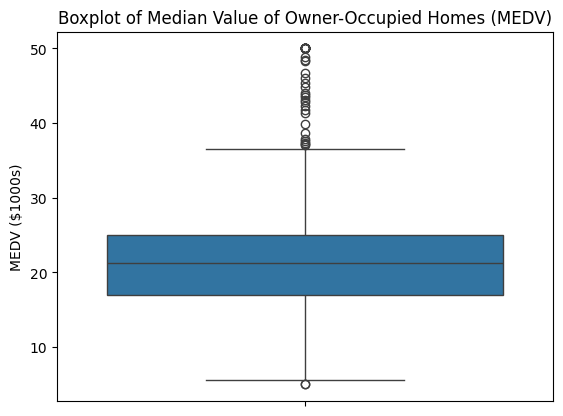

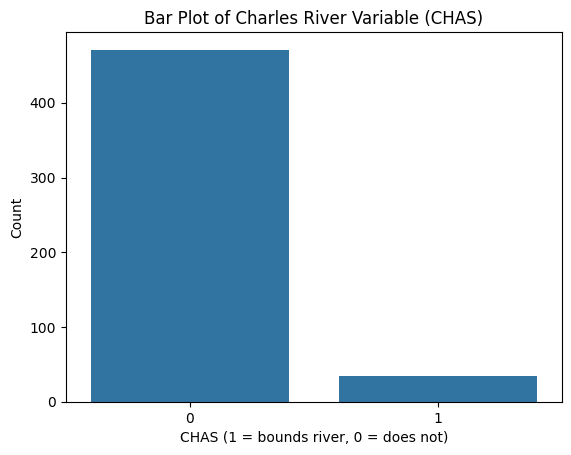

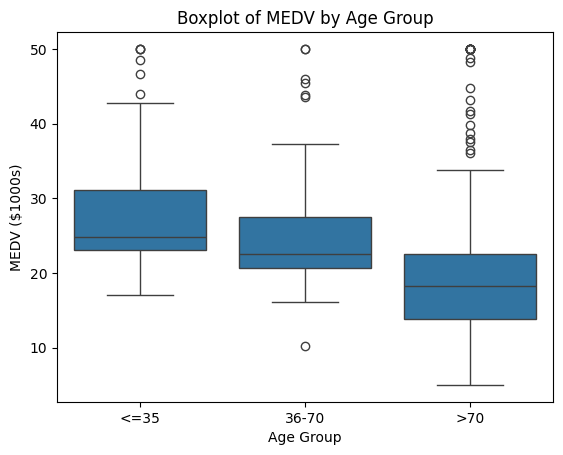

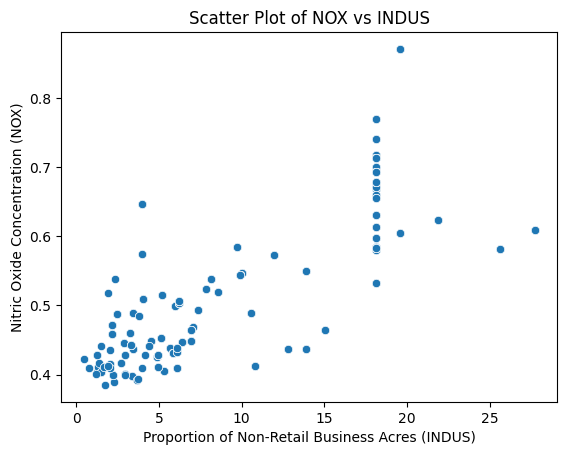

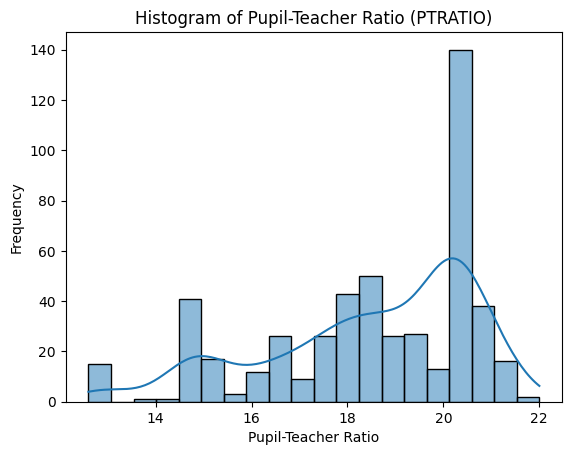

T-test for MEDV by CHAS
T-statistic: 3.9964, P-value: 0.0001
Conclusion: Significant difference in MEDV between CHAS groups.

ANOVA for MEDV by AGE_GROUP
                 sum_sq     df         F        PR(>F)
AGE_GROUP   5401.731883    2.0  36.40765  1.710501e-15
Residual   37314.563532  503.0       NaN           NaN

Pearson Correlation between NOX and INDUS
Correlation Coefficient: 0.7637, P-value: 0.0000
Conclusion: Significant correlation between NOX and INDUS.

Regression Analysis: DIS vs MEDV
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 19 Oct 2025   Prob (F-statistic):           1.21e-08
Time:                        20:42:37   Log-Likelihood:                -1823.9
No. Observations:     

In [12]:
# Task 2: Descriptive Statistics and Visualizations

# Boxplot for MEDV
sns.boxplot(y=df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('MEDV ($1000s)')
plt.show()

# Bar plot for CHAS
sns.countplot(x='CHAS', data=df)
plt.title('Bar Plot of Charles River Variable (CHAS)')
plt.xlabel('CHAS (1 = bounds river, 0 = does not)')
plt.ylabel('Count')
plt.show()

# Boxplot for MEDV vs AGE groups
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '36-70', '>70'])
sns.boxplot(x='AGE_GROUP', y='MEDV', data=df)
plt.title('Boxplot of MEDV by Age Group')
plt.xlabel('Age Group')
plt.ylabel('MEDV ($1000s)')
plt.show()

# Scatter plot for NOX vs INDUS
sns.scatterplot(x='INDUS', y='NOX', data=df)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()

# Histogram for PTRATIO
sns.histplot(df['PTRATIO'], bins=20, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

# Task 3: Statistical Tests

# 1. T-test: MEDV difference by CHAS
group1 = df[df['CHAS'] == 1]['MEDV']
group2 = df[df['CHAS'] == 0]['MEDV']
t_stat, p_val = stats.ttest_ind(group1, group2)
print("T-test for MEDV by CHAS")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")
if p_val < 0.05:
    print("Conclusion: Significant difference in MEDV between CHAS groups.")
else:
    print("Conclusion: No significant difference in MEDV between CHAS groups.")

# 2. ANOVA: MEDV by AGE_GROUP
anova_model = ols('MEDV ~ AGE_GROUP', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("\nANOVA for MEDV by AGE_GROUP")
print(anova_table)

# 3. Pearson Correlation: NOX vs INDUS
corr_coef, corr_pval = stats.pearsonr(df['NOX'], df['INDUS'])
print("\nPearson Correlation between NOX and INDUS")
print(f"Correlation Coefficient: {corr_coef:.4f}, P-value: {corr_pval:.4f}")
if corr_pval < 0.05:
    print("Conclusion: Significant correlation between NOX and INDUS.")
else:
    print("Conclusion: No significant correlation between NOX and INDUS.")

# 4. Regression: DIS impact on MEDV
X = sm.add_constant(df['DIS'])
model = sm.OLS(df['MEDV'], X).fit()
print("\nRegression Analysis: DIS vs MEDV")
print(model.summary())